# Project on Airbnb company 

# This project Goal:
Suppose you are working in the data-driven domain at Airbnb. You have a dataset and need to derive insights from it to answer key business questions, as company officials aim to grow the business.

* What is the distribution of listing prices?
* How are different room types distributed?
* How are listings distributed across different neighborhoods?
* What is the relationship between price and room type?
* How has the number of reviews changed over time?


In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load dataset
df = pd.read_csv("airbnb_dataset.csv")

C:\Users\Kamran\AppData\Local\Temp\ipykernel_11084\1071194227.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_dataset.csv")


In [15]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [16]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# checking missing values

In [17]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

###  Handling missing values

In [21]:
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [26]:
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace = True)

In [27]:
df.dropna(subset = ['NAME', 'host name'], inplace = True)

In [29]:
df = df.drop(columns = ["licene", "house_rules"], errors = "ignore")

In [ ]:
# remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]','', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Kamran\AppData\Local\Temp\ipykernel_11084\3507404238.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float);
C:\Users\Kamran\AppData\Local\Temp\ipykernel_11084\3507404238.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]','', regex=True).astype(float);


### checking duplicate and remove

In [48]:
df.duplicated().sum() # check duplicates
df.drop_duplicates(inplace = True)

### Descriptive Statistics

In [51]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


## Visualization
### What is the distribution of listing prices?

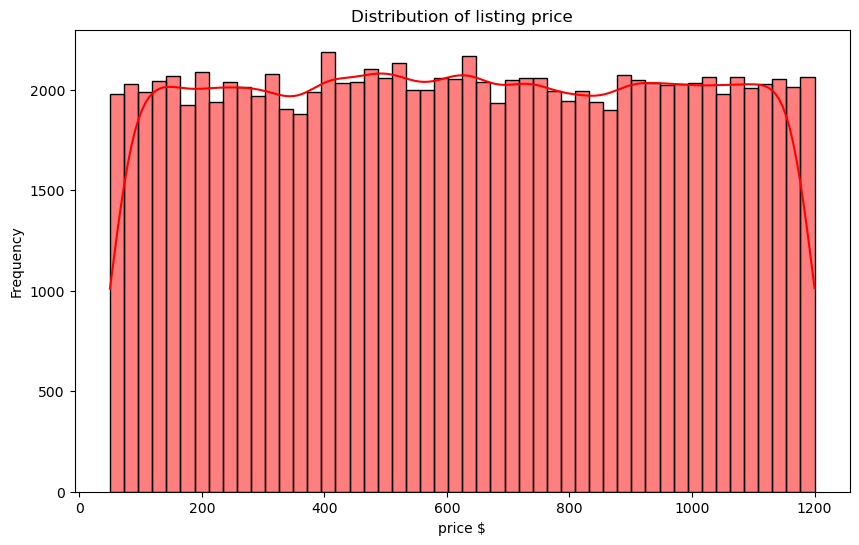

In [59]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 50, kde = True, color = 'red')
plt.title("Distribution of listing price")
plt.xlabel('price $')
plt.ylabel('Frequency')
plt.show()

It suggests prices are fairly evenly spread across the range, with no strong peaks or gaps.

### How are different room types distributed?

In [60]:
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

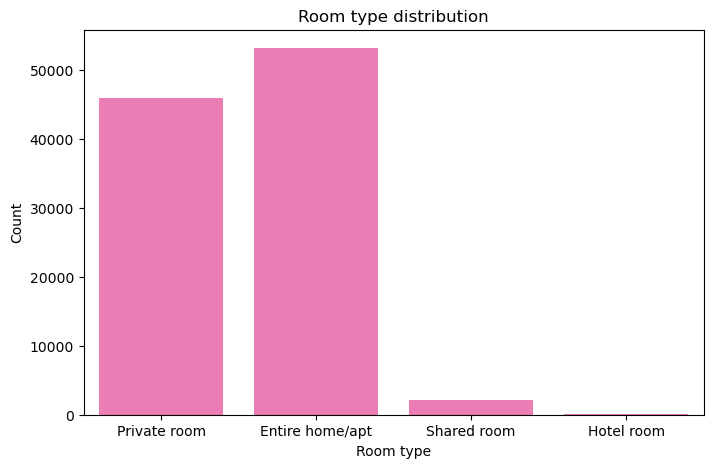

In [63]:
plt.figure(figsize = (8,5))
sns.countplot( x= "room type", data = df, color = "hotpink")
plt.title("Room type distribution")
plt.xlabel("Room type")
plt.ylabel("Count")
plt.show()

This chart shows the distribution of Airbnb listings by room type. "Entire home/apt" is the most prevalent category, followed by "Private room." The "Shared room" and "Hotel room" categories represent a significantly smaller proportion of the total listings. This indicates a market preference for greater privacy among guests.

###  How are listings distributed across different neighborhoods?

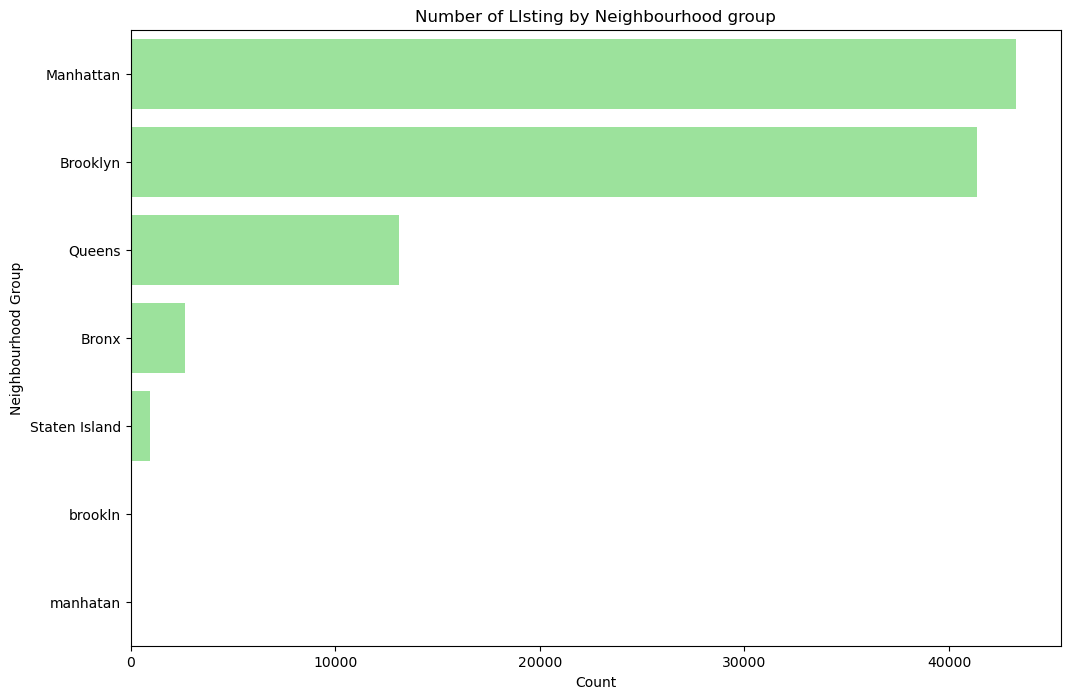

In [64]:
plt.figure(figsize = (12,8))
sns.countplot(y= 'neighbourhood group', data= df,color= 'lightgreen', order= df['neighbourhood group'].value_counts().index )
plt.title("Number of LIsting by Neighbourhood group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.show()

###  What is the relationship between price and room type?

C:\Users\Kamran\AppData\Local\Temp\ipykernel_11084\1520881800.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title= "Room Type")


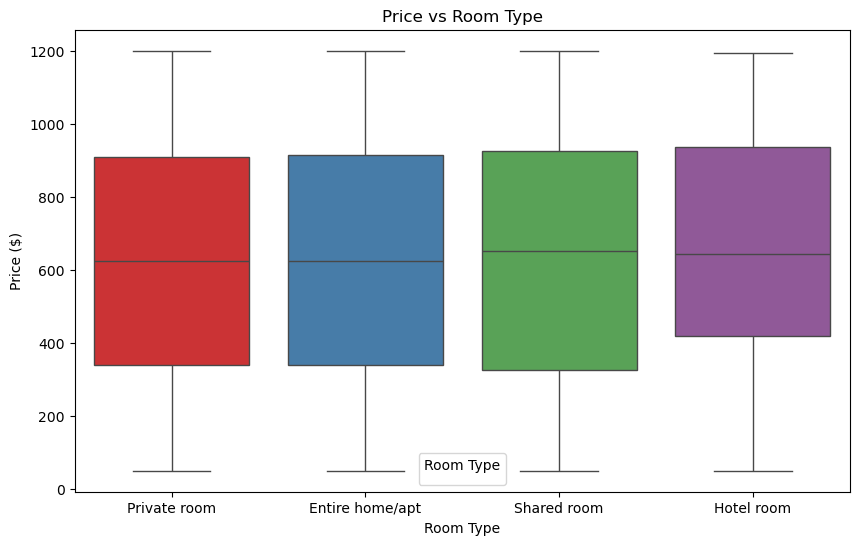

In [67]:
plt.figure(figsize= (10,6))
sns.boxplot(x= 'room type', y= 'price', hue= 'room type', data= df, palette= 'Set1')
plt.title("Price vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.legend(title= "Room Type")
plt.show()

###  How has the number of reviews changed over time?

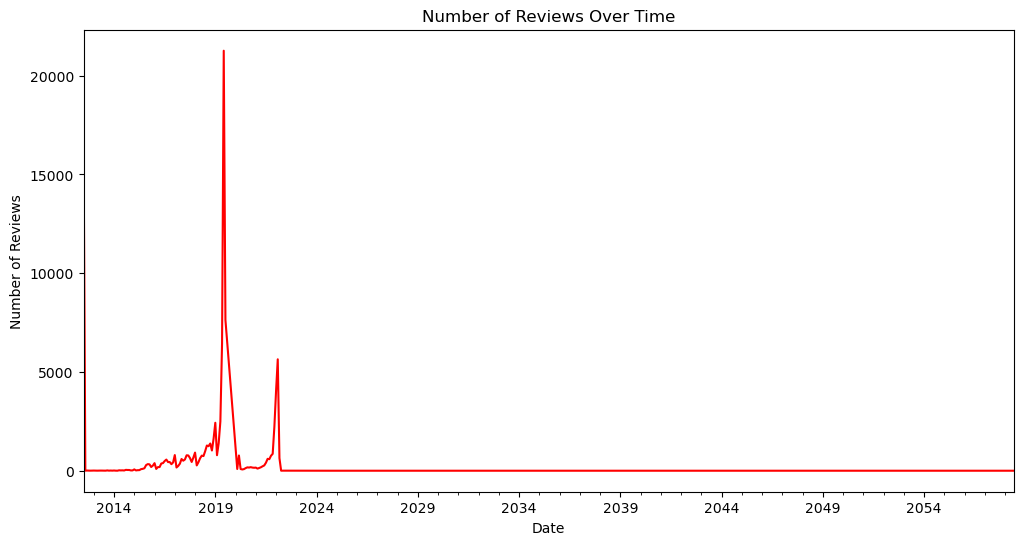

In [68]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize= (12,6))
reviews_over_time.plot(kind= 'line', color= 'red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()